11окт23

# Продолжение matplotlib. Еще больше графиков!
* Как построить график *hist*?
* Что такое график скрипкой?
* Как сделать график более симатичным?
* Как не писать одно и то же несколько раз?

Сегодня продолжим плоские графики, которые начали в прошлый раз.

Для начала возьмем данные. В этот раз в качестве примера я решил взять известную таблицу ирисов. Я называю ее известной, потому что она очень часто используется как задача для машинного обучения. У этого исследования даже есть страница на [википедии](https://ru.wikipedia.org/wiki/Ирисы_Фишера).

In [1]:
from pandas import read_csv
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

df = read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Всегда рад позаботиться о тех, кто не знает английский.
* *sepal length* – длина чашелистика
* *sepal width* – ширина чашелистика
* *petal length* – длина лепестка
* *petal width* – ширина лепестка

В таблице 4 численных значения и одно строковое – вид этого растения (ириса). В таблице три разных вида этих ирисов.

Для общего развития, ирис это растение, выглядит следующим образом.

<img src="https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l5p1.jpg" width="500" height="500">

А на этой картинке показано, что есть лепесток, а что – чашелистик.

<img src="https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l5p2.jpg" width="700" height="700">

## Histogram
Ссылка на [документацию](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist).
Гистограмма – вид графика, показывающий распределение по количеству значений. В общем-то та же столбчатая диаграмма, но здесь не нужно вручную указывать высоту столбцов, она посчитается автоматически.

Построим сразу 4 графика, по каждому из значений.

<IPython.core.display.Javascript object>


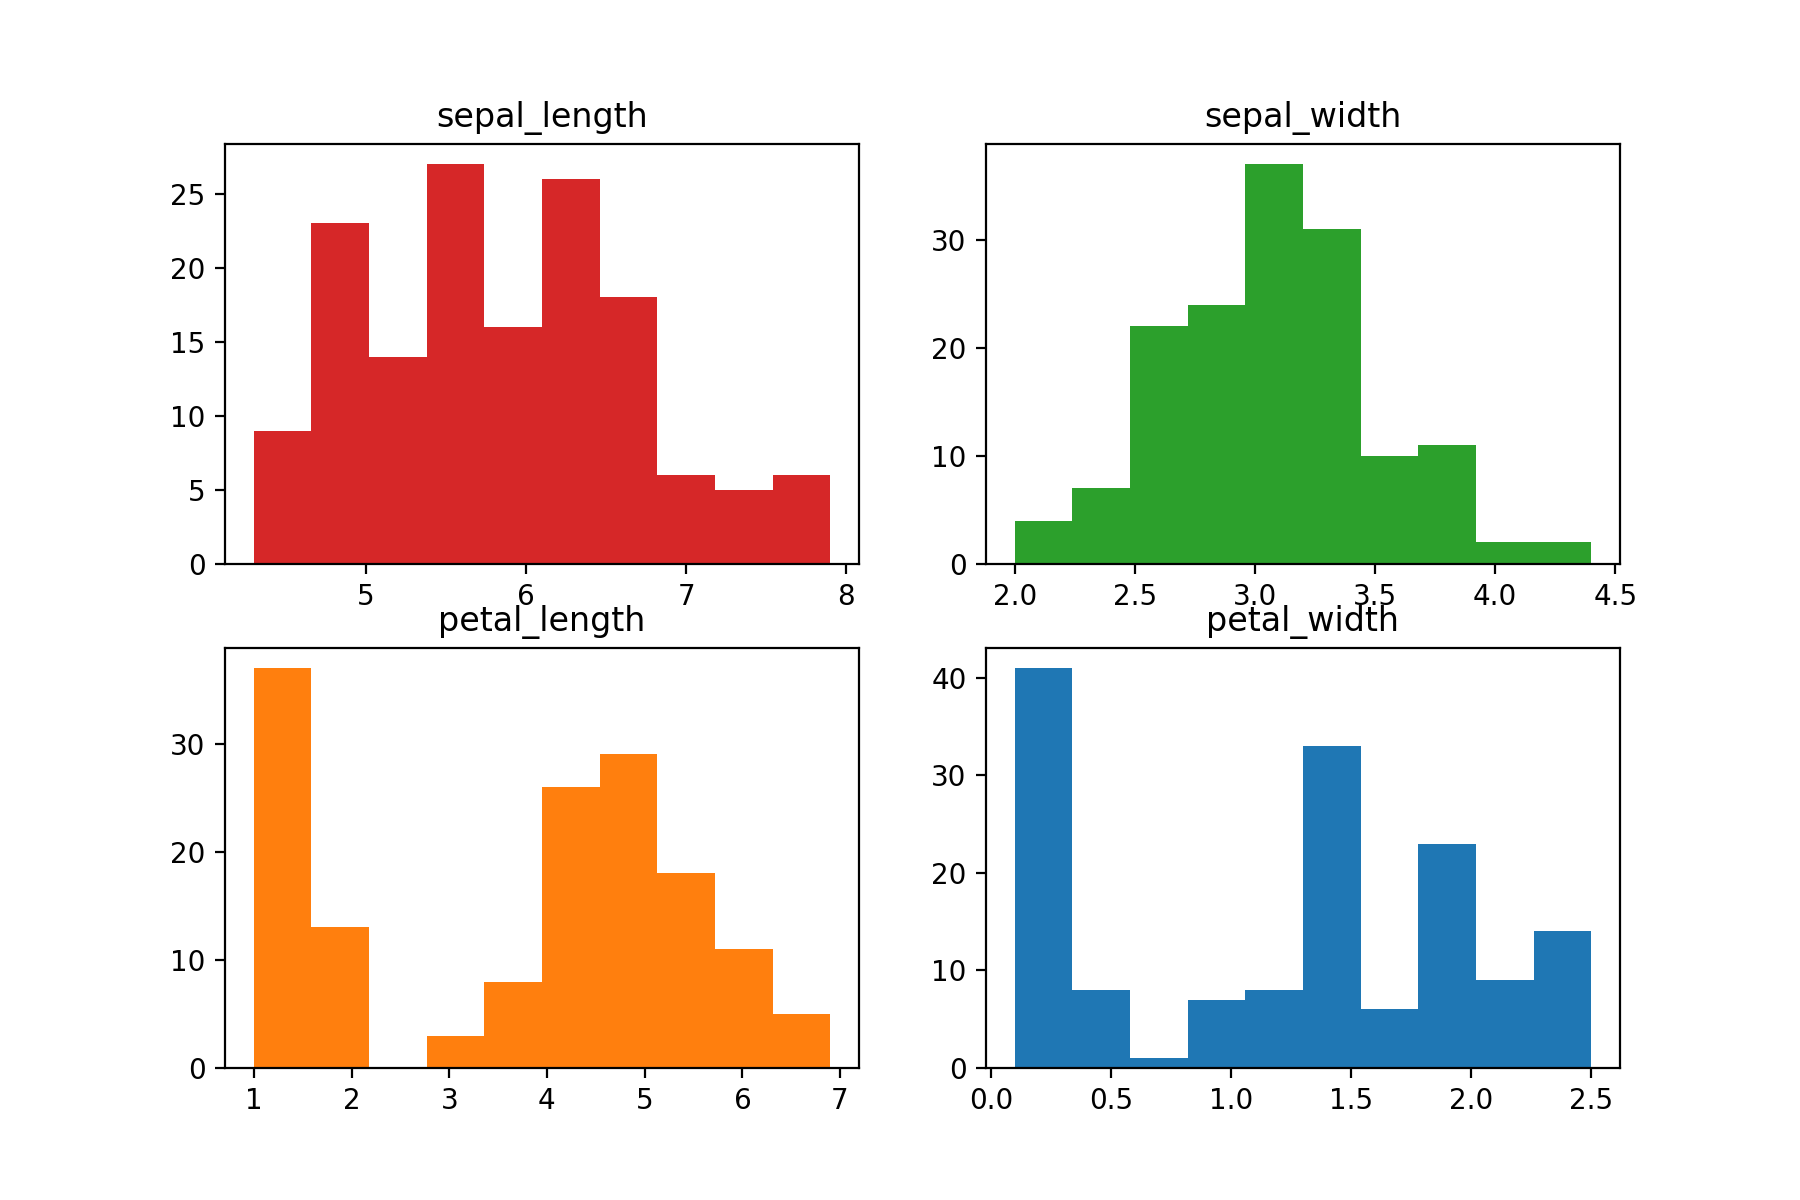

In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(2, 2, figsize=(9, 6))

# тут вывожу каждый график по отдельности
ax[0, 0].hist(df["sepal_length"], color="tab:red")
ax[0, 0].set_title("sepal_length")

ax[0, 1].hist(df["sepal_width"], color="tab:green")
ax[0, 1].set_title("sepal_width")

ax[1, 0].hist(df["petal_length"], color="tab:orange")
ax[1, 0].set_title("petal_length")

ax[1, 1].hist(df["petal_width"], color="tab:blue")
ax[1, 1].set_title("petal_width")

plt.show()

Слово о красоте кода. Конечно, можно выводить четыре графика так, как я сделал это в поле выше, но на мой взгляд, в случае, когда эти графики одинаковые – лучше делать это циклом, как я сделал в поле ниже. Так требуется чуть больше подумать, но зато код выглядит приятнее.

<IPython.core.display.Javascript object>


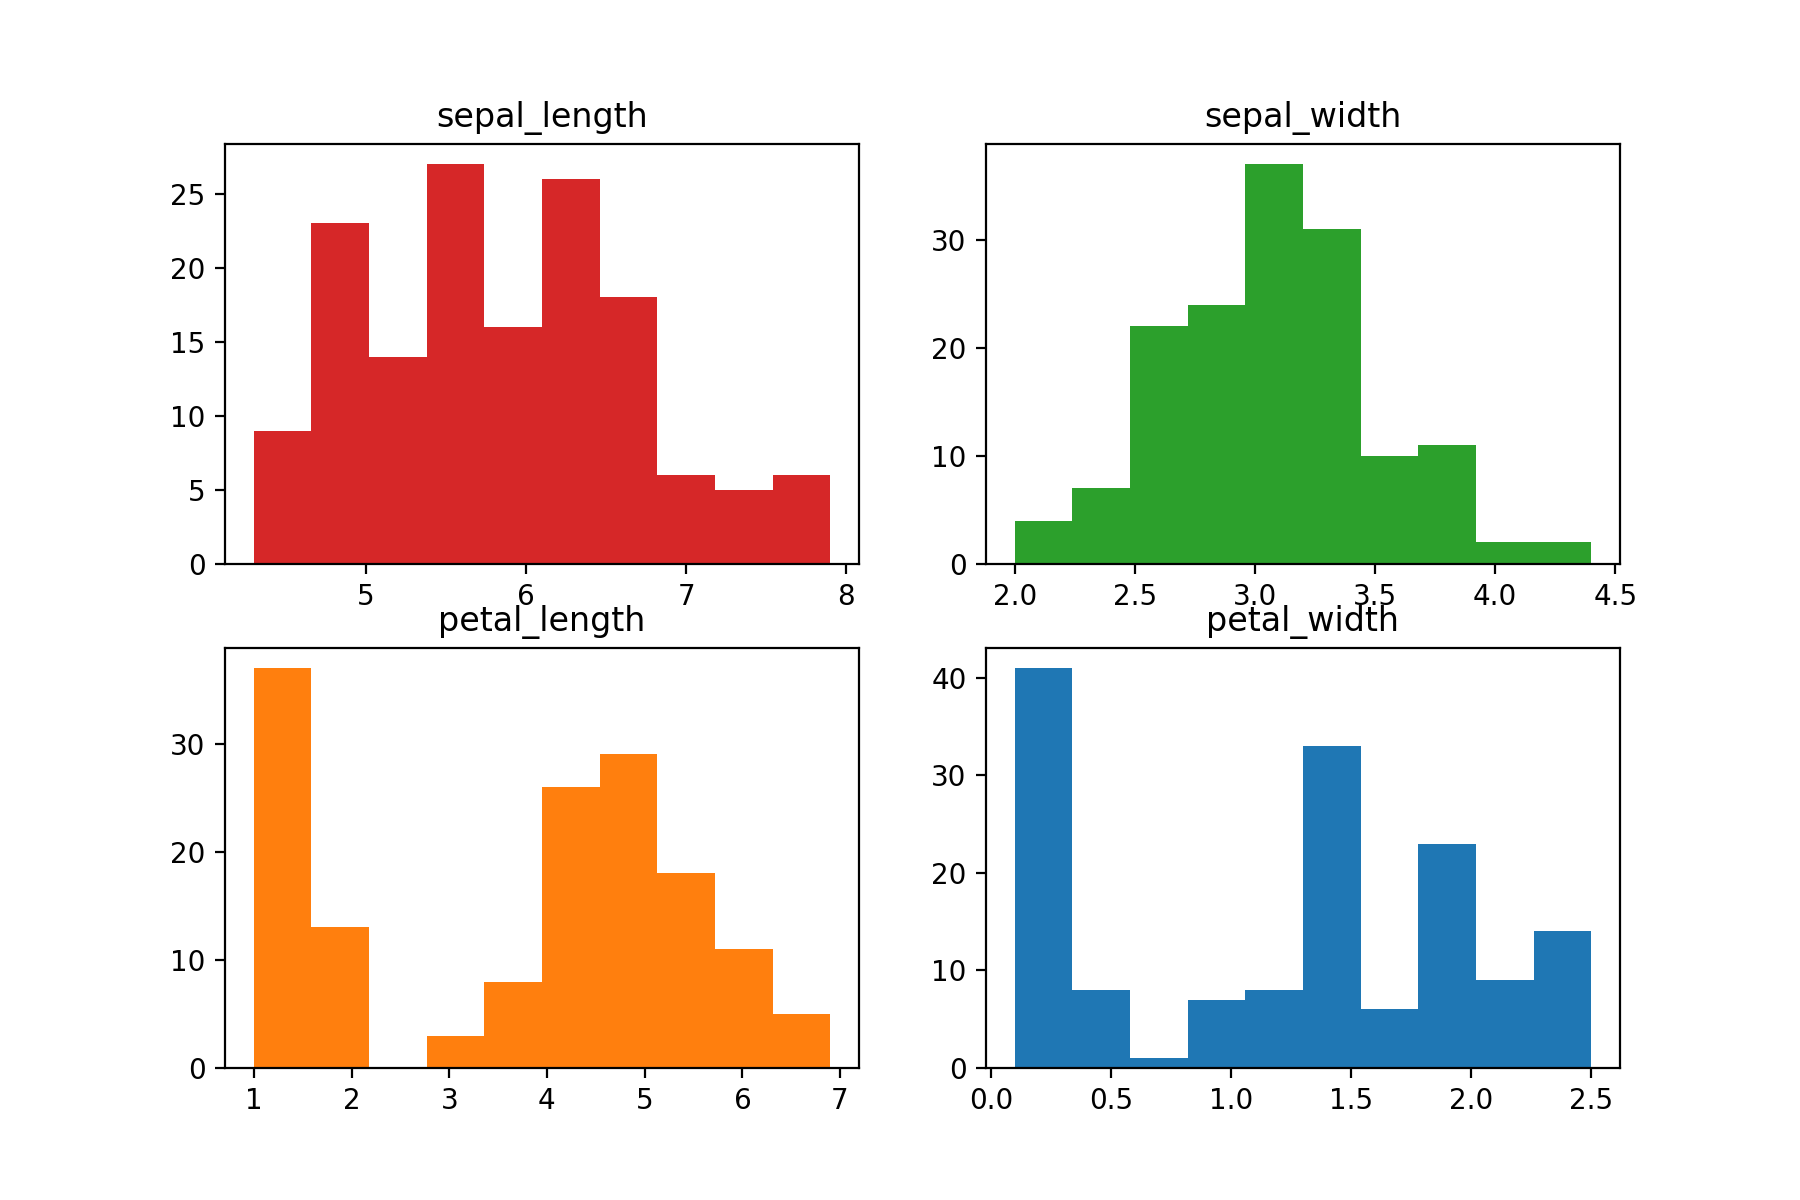

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(9, 6))

cols = df.columns[:-1]

colors = ("tab:red", "tab:green", "tab:orange", "tab:blue")

# тут вывожу все графики одним циклом
for i in (0, 1):
    for j in (0, 1):
        ax[i, j].hist(df[cols[i * 2 + j]], color = colors[i * 2 + j])
        ax[i, j].set_title(cols[i * 2 + j])

plt.show()

## Violinplot
Вот [документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html#matplotlib.axes.Axes.violinplot). График скрипкой, это почти гистограмма, но вертикальная и не одна.

<IPython.core.display.Javascript object>


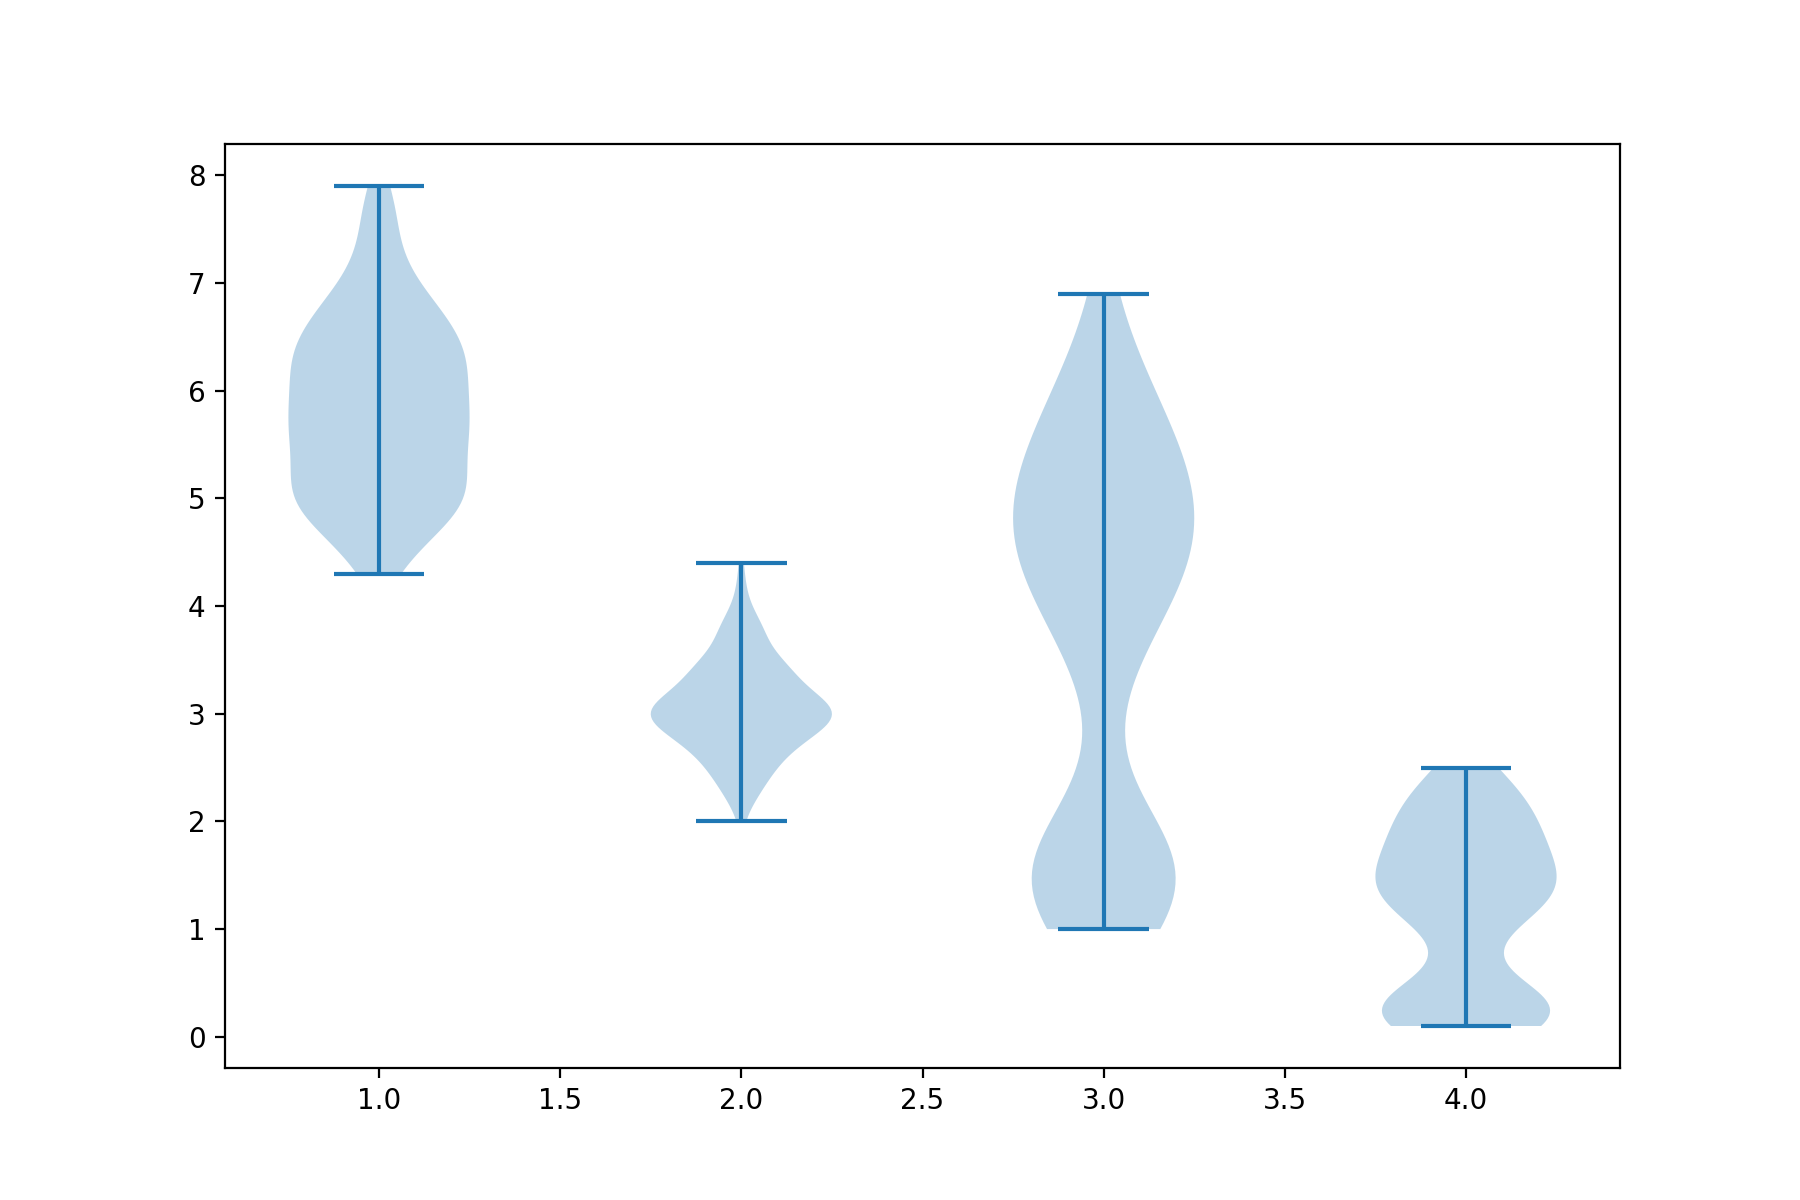

In [4]:
from numpy import array

fig, ax = plt.subplots(figsize=(9, 6))

arr_violin = array(df.drop("species", axis=1))

ax.violinplot(arr_violin)

plt.show()

Обычный график скрипкой выглядит так, как показано выше, но [документация](https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py) предлагает немало инструментов кастомизации, чтобы он выглядил симпатичнее.

Для примера поменяю цвета и расположение.

<IPython.core.display.Javascript object>


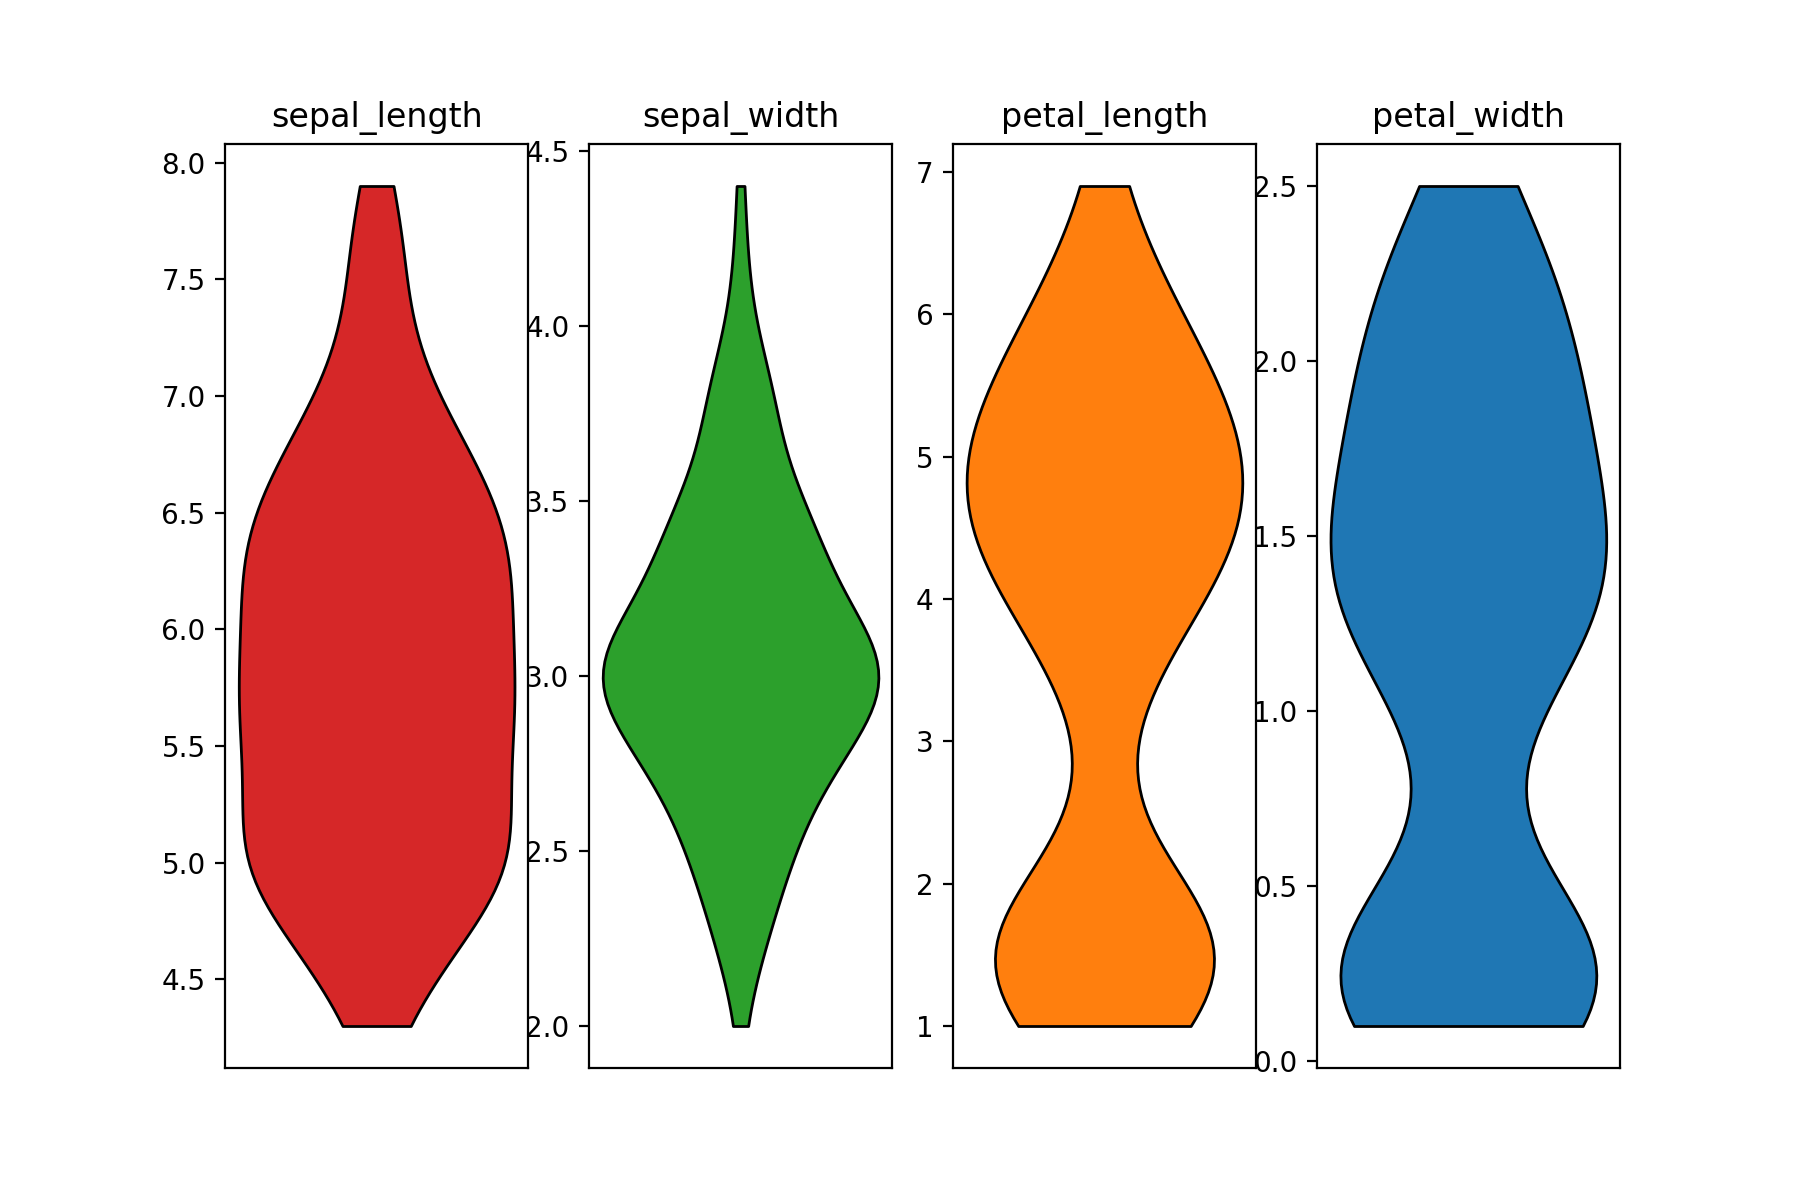

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(9, 6))

for i in range(4):
    
    # создаю каждую скрипку на отдельном графике
    plot = axes[i].violinplot(arr_violin[:, i], 
                              showmeans=False, 
                              showmedians=False, 
                              showextrema=False)
    
    axes[i].set_title(cols[i])
    
    # меняю цвет заливки
    plot["bodies"][0].set_facecolor(colors[i])
    
    # меняю цвет контура
    plot["bodies"][0].set_edgecolor('black')
    
    # меняю прозрачность
    plot["bodies"][0].set_alpha(1)
    
    # убираю значения на оси y
    axes[i].xaxis.set_ticks([]) 

       
    
plt.show()

## Снова scatter
Хоть и был уже, [документацию](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) все равно продублирую.

Проблема предыдущих двух графиков в том, что на них не видно различие, между разными видами ирисов. Можно было вывести по 4 графика для каждого отдельного вида, но тогда графиков было бы слишком много.

Выведем по отдельности графики длины-ширины чашелистиков и лепестков.

### Чашелистики

<IPython.core.display.Javascript object>


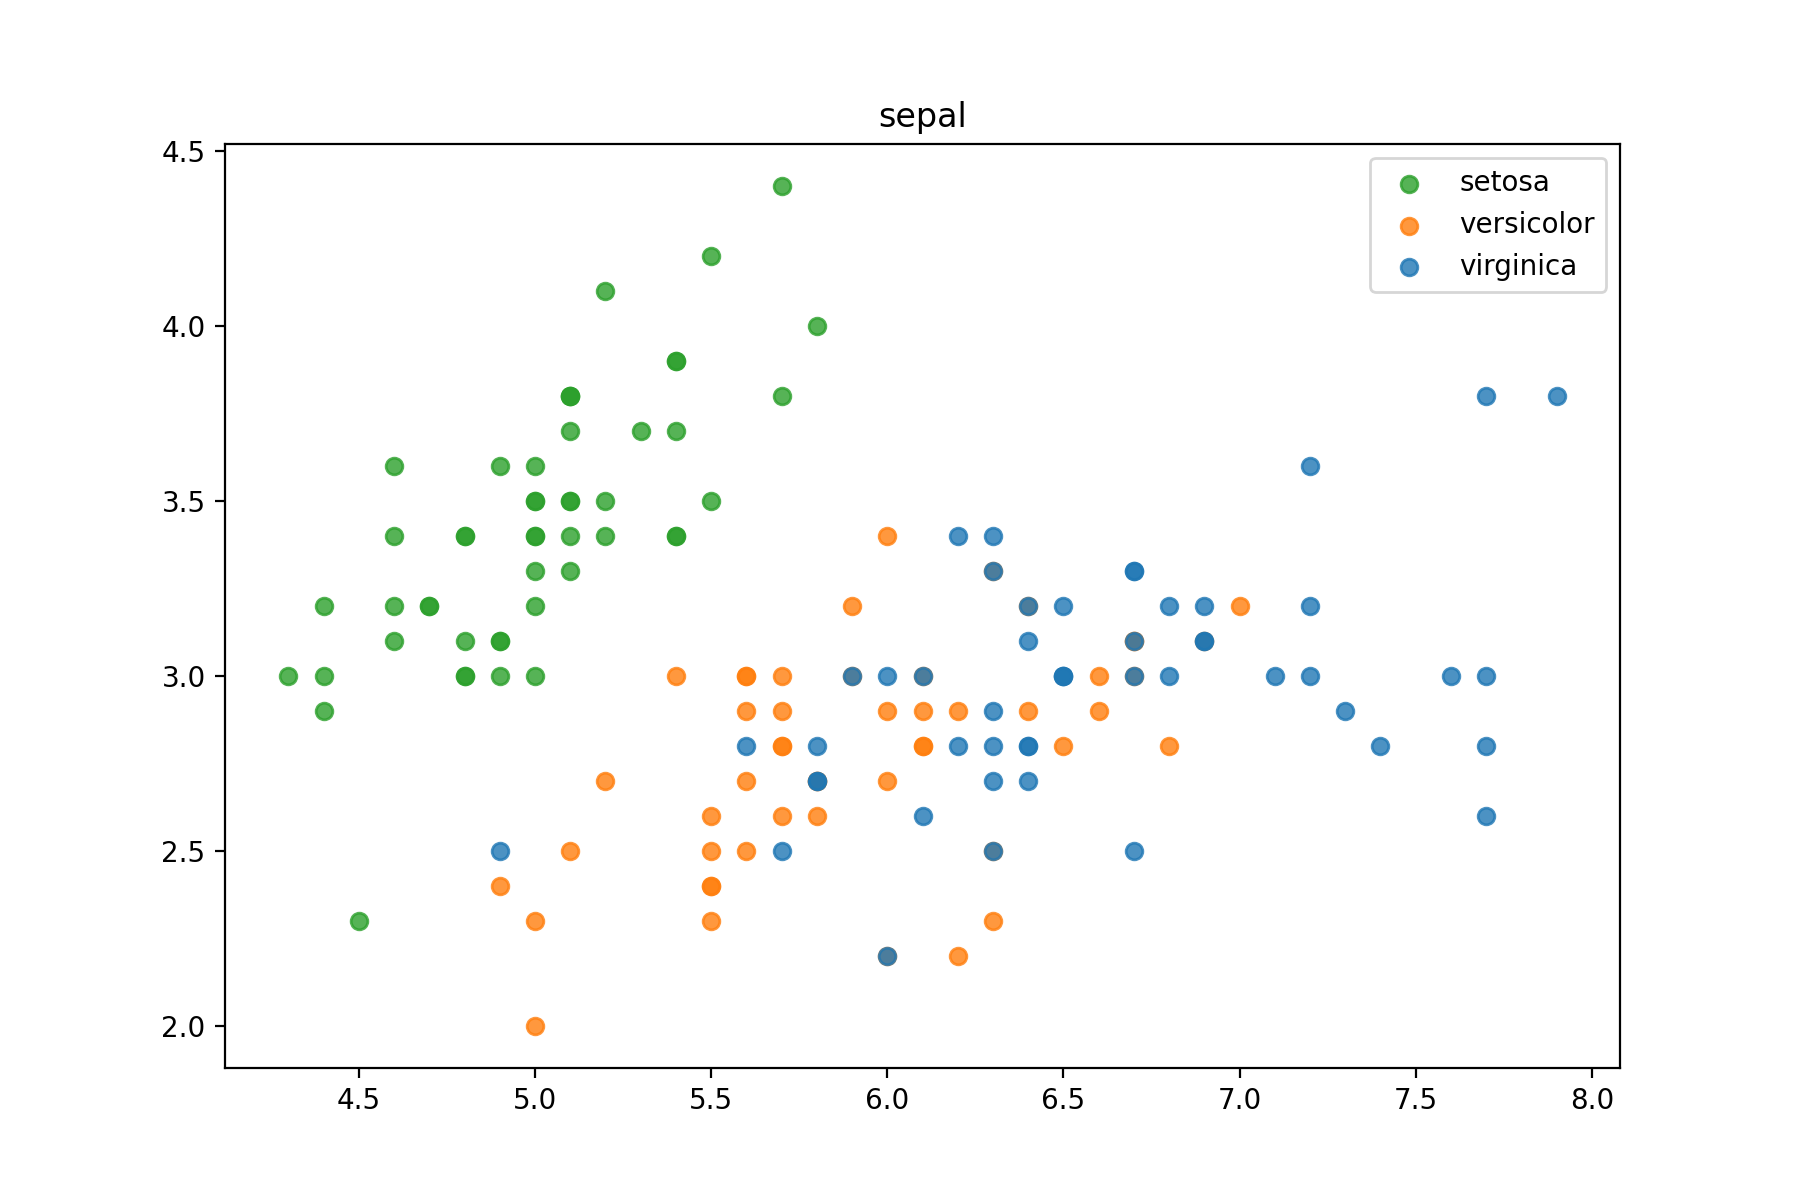

In [6]:
from pandas import Series

fig, ax = plt.subplots(figsize=(9, 6))

species_colors = Series({
    "setosa"     : "tab:green",
    "versicolor" : "tab:orange",
    "virginica"  : "tab:blue"
})

plots = []
for i in range(3):
    plots.append(ax.scatter(df[df["species"] == species_colors.index[i]]["sepal_length"], 
                            df[df["species"] == species_colors.index[i]]["sepal_width"], 
                            c=species_colors[i], 
                            alpha = 0.8))

ax.set_title("sepal")
ax.legend(plots, species_colors.index)

plt.show()

### Лепестки

<IPython.core.display.Javascript object>


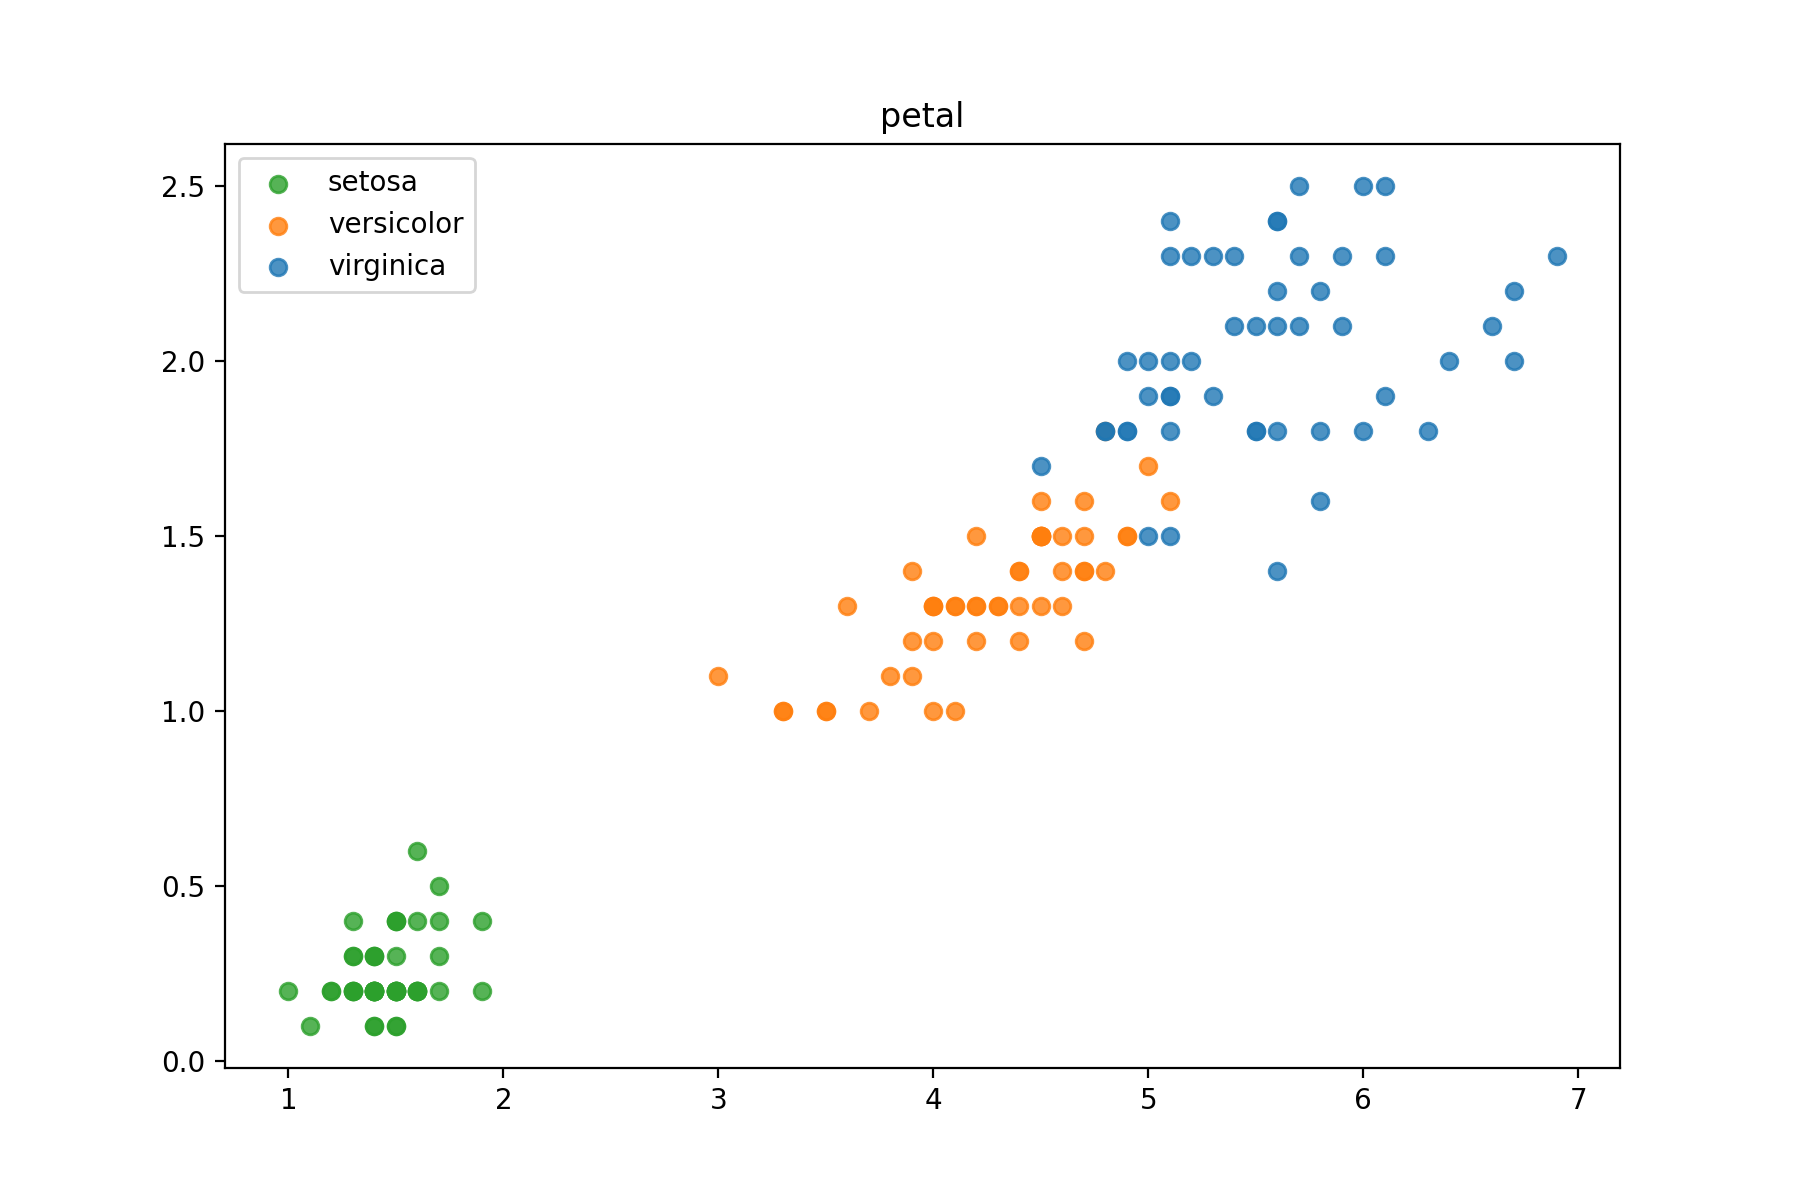

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))

species_colors = Series({
    "setosa"     : "tab:green",
    "versicolor" : "tab:orange",
    "virginica"  : "tab:blue"
})

plots = []
for i in range(3):
    plots.append(ax.scatter(df[df["species"] == species_colors.index[i]]["petal_length"], 
                            df[df["species"] == species_colors.index[i]]["petal_width"], 
                            c=species_colors[i], 
                            alpha = 0.8))

ax.set_title("petal")
ax.legend(plots, species_colors.index)

plt.show()

---
## Задачи для самостоятельного выполнения
Дедлайн 17окт23 23:59.



На основе [csv таблицы](https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l5t1.csv) (чуть позже придумаю, куда ее выложить) 
1. Построить гистограммы (hist) роста и веса (вне зависимости от профессии), два графика в одном выводе
2. Построить график скрипки по распределению зарплаты в разных профессиях

Настоятельно прошу подписывать графики, делать понятные легенды. Цветастые графики приветствуются.